<h1><b>Statistical Analysis</b></h1>
<h2><b>Maximizing Revenue for cab Drivers through Analyzing using Python</b></h2>

### Problem Statement
<hr>
<p>In the fast-paced booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to usee data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to detemine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.</p>

### Objective
<hr>
<p>This project's maon goal is to run an A/B test to examine the relationship between the total fare and method of payment. In this we would use Python programming language, hypothesis testing, and Descriptive Statistics to extract useful information that can help taxi drivers generate more cash. In this particular case, we want to find out if there is big difference in the for those who pay with credit cards versus those who pay with cash.</p>

### Research Question
<hr />
<p>Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers without negatively impacting customer experience?</p>

In [1]:
# Importing the Libraries pandas, matplotlib, numpy, seaborn, scipy.stats, statsmodels, warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [2]:
# Loading the dataset
df = pd.read_csv('C:\\Users\\ratha\\OneDrive\\Desktop\\Portfolio Projects\\project_stats_hypothesis_testing\\data\\raw_data\\yellow_tripdata_2020-01.csv')
# Head Dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis
<hr />
<b>The Follwoing Points would be being covered</b>
<ul>
    <li>Data cleansing, Data Transformation, Feature Engineering</li>
    <li>Analysis & Data Visualisation</li>
    <li>Testing of Hypothesis</li>
    <li>Results and Recommadations</li>
</ul>

In [3]:
# Shape of the Dataset
print(df.shape)
# The fields datatypes
df.dtypes

(6405008, 18)


VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [4]:

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [5]:
# creation of new field(column: duration) by subtracting from dropoff_datetime to pickup_datetime.
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
# Change seconds into the minutes
df['duration'] = df['duration'].dt.total_seconds()/60
# new format of 2-Dimentional data
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [6]:
# Filtering the data, those fields that are used for analysis.
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [7]:
# Checking for the Null values in the Dataset
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [8]:
# Check for the contribution, How much percentage of contributing by specific column.
# 'Passenger_count','payment_type' these are two columns consists Null values.
print(f"{round((65441/len(df))*100,2)}%")

1.02%


In [9]:
# Drop the null values by using the function of dropna() and have attributes inplace is TRUE.
df.dropna(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [10]:
# converting the datatypes of 'passenger_count' and 'payment_type' fields and columns.
# 'passenger_count' & 'payment_type' could not be float.

## typecasting of 'passenger_count' to integer
df['passenger_count'] = df['passenger_count'].astype('int64')

## typecasting of 'payment_type' to interger
df['payment_type'] = df['payment_type'].astype('int64')

## print dataset
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [11]:
# Check for the Duplicates value in dataframe(df)
df[df.duplicated()]

# Dropping the duplicates values
df.drop_duplicates(inplace = True)

# shape of the dataset
df.shape

(3007861, 5)

In [12]:
# No. of number travelling  
df['passenger_count'].value_counts(normalize = True).round(4)

passenger_count
1    0.5820
2    0.1904
3    0.0664
5    0.0629
6    0.0393
4    0.0360
0    0.0230
7    0.0000
9    0.0000
8    0.0000
Name: proportion, dtype: float64

In [13]:
# passenger_count_ proportion (probability) corresponds to payment_type.
df['payment_type'].value_counts(normalize = True).round(4)

payment_type
1    0.6783
2    0.3076
3    0.0087
4    0.0054
5    0.0000
Name: proportion, dtype: float64

In [14]:
# filter the Data for 'payment_type'
## there is less probabilty of of choosing payment_type (3,4,5) out of avilable options.
df = df[df['payment_type'] < 3]

# Filter,by analysing conditions for 'passenger_count' how many passenger_count may travel simuntaneously.
## low chance of travelling of passenger in a trip more than 5 passenger_count.
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

# Checking for the Data
df.shape


(2780283, 5)

In [15]:
# Replaing the [1,2] by corresponds ['Card','Cash']
df['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

# Describing the data
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [16]:
# by describe(), got min of [fare_amount, trip_distance] is negative. is it posiible? basically, No.
## Remove the Negative Values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [17]:
for col in ['fare_amount','trip_distance','duration']:
    # calculate 25% percentile
    quartile_1 = df[col].quantile(0.25)
    # calculate 75% percentile
    quartile_3 = df[col].quantile(0.75)
    # inter_quartile_range, By subtracting from _third_quartile to the first_quartile.
    inter_quartile = quartile_3 - quartile_1

    # (lower_value, upper_value) an interval in which the value of (col) must lie within it. otherwise they're outliers.
    lower = quartile_1 - 1.5*inter_quartile
    upper = quartile_3 + 1.5*inter_quartile

    df = df[(df[col]>=lower) & (df[col]<=upper)]

# New Object for the manupulated table.
dframe = df

# Save Processed DataFrame to CSV
dframe.to_csv('C:\\Users\\ratha\\OneDrive\\Desktop\\Portfolio Projects\\project_stats_hypothesis_testing\\data\\processed_data\\processed_yellow_tripdata_2020-01.csv', index=False)


# print the dataset of df (dataframe)
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333


## Plotting the barstacked Histogram for Cash and Card.

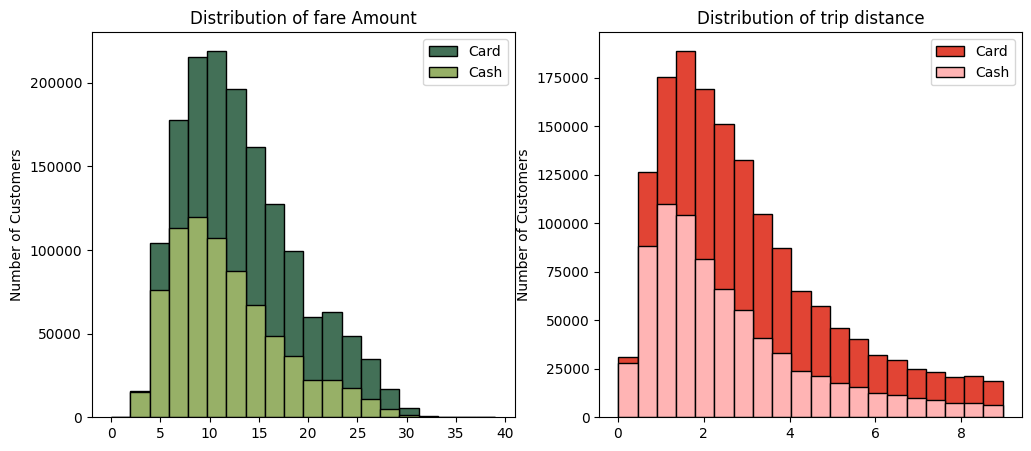

In [18]:
# plot figure of the given size
plt.figure(figsize=(12,5))

# showing the first-subplot
plt.subplot(1,2,1)

# Distribution of fare amount
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#437057', label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#97B067', label='Cash')

# Title and labelling of x-Axis and y-Axis
plt.title('Distribution of fare Amount')
plt.ylabel('Number of Customers')
plt.legend()

# # Showing the second-subplot 
plt.subplot(1,2,2)

# Distribution of trip Distance
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#E14434', label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FFB4B4', label='Cash')

# Title and labelling of x-Axis and y-Axis
plt.title('Distribution of trip distance')
plt.ylabel('Number of Customers')

# Showing the legends, What are they representing.
plt.legend()
plt.show()

### The Distrubution of Fare Amount
- As shown in the figure, the dataset is not Normally Distributed.
- it's slightly right tailed hence the distution is positively skewed.
### The Distribution of Trip Distance
- This is also not normally distributed.
- trip distribution also more tailed to the right therefore it's positively skewed.

In [19]:
# grouping fare_amount(mean, stand. dev) and trip_amount(mean, stand. dev) corresponds to the Card and Cash.
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

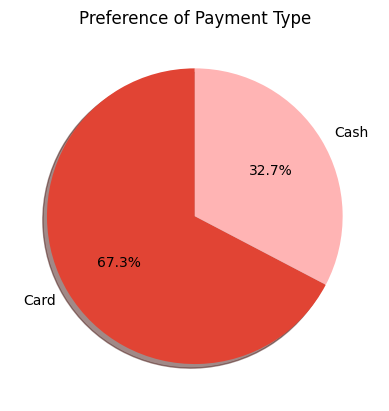

In [20]:
# Plot the Pie Chart fpr payment_type
# representing the percentage of population adopt payment_type either from cash or card.
plt.title('Preference of Payment Type')

plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#E14434','#FFB4B4'])
plt.show()

In [21]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [22]:
# Grouping the passenger_type and passenger_count.
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

# rename field name from 'passenger_count' to count
passenger_count.rename(columns = {'passenger_count':'count'}, inplace= True)

# resetting the indexs
passenger_count.reset_index(inplace = True)

In [23]:
# Count the passengers using cash or card and how mant are they travelling.
passenger_count['percentage'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [24]:
# 'passenger_count' table with fields, these are 'payment_type', 'passenger_count', 'count' and 'percentage'.
passenger_count

,payment_type,passenger_count,count,percentage
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [25]:
# Transform the above dataset format
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])

# 'payment_type' consists two values these are Cash and Card.
df['payment_type'] = ['Card','Cash']

# by using iloc[] changing the metrix shape of above matrix.
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


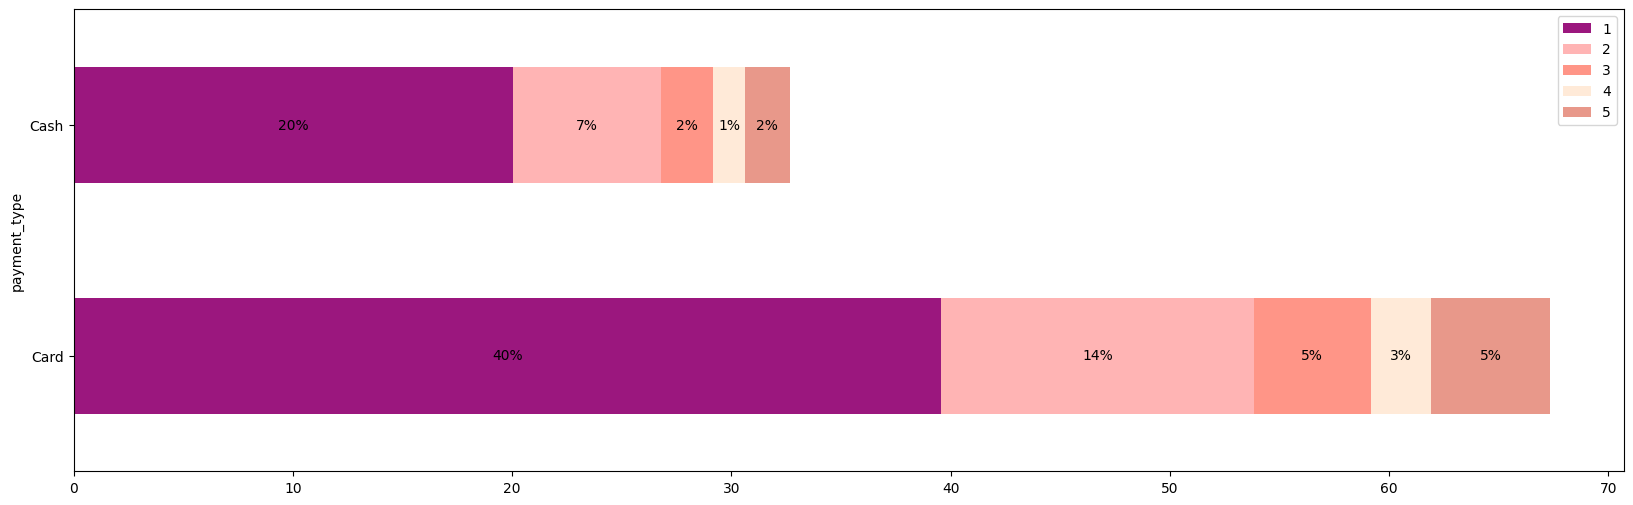

In [26]:
# Plotting the Horizontal bar graph, depicting legends, stacked eith different.
fig, ax = plt.subplots(figsize = (20, 6))

# df.plot() plotting the stacked bar chart.
df.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax, color = ['#9B177E', '#FFB4B4', '#FF9587', '#FFEAD8','#E8988A', ])

# Add percentage  values & text to the stacked
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x , y = p.get_xy()
    ax.text(x+width/2, y + height/2, '{:.0f}%'.format(width), 
           horizontalalignment = 'center', 
           verticalalignment = 'center')

## Testing of Hypothesis
<b>Defining the Null Hypothesis and Alternative Hypothesis</b>
<hr>
<b>Null Hypothesis:</b> There is no difference in average fare between customers who use credit cards and customers who use cash.
<br>
<b>Alternate Hypothesis:</b> There is difference in average fare between customers who use credit cards and customers who use cash.
<hr />



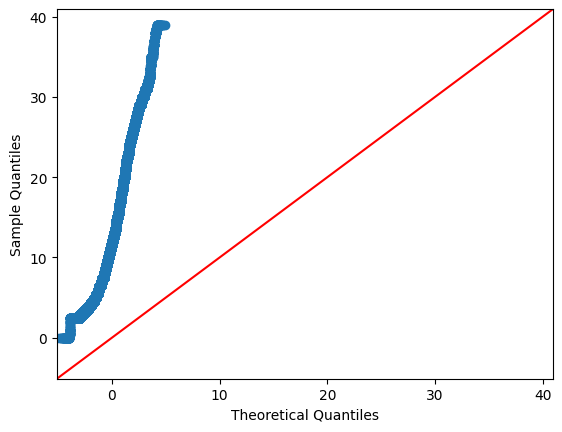

In [27]:
# from statsmodels library calling qqplot()
sm.qqplot(dframe['fare_amount'], line = '45')

# Show the graph
plt.show()


In [28]:
# Collcetion of Card Sample.
card_sample = dframe[dframe['payment_type'] == 'Card']['fare_amount']

# Collection of Cash Sample.
cash_sample = dframe[dframe['payment_type'] == 'Cash']['fare_amount']

In [29]:
# Determine the values of t_stat and p_value.
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)

# Show the required result
print(f't-Statistics: {round(t_stats,2)}, p_value: {p_value}')


t-Statistics: 169.21, p_value: 0.0


## Regression Analysis
### Simple Linear Regression Analysis

In [37]:
# Show the dataset for which regression analysis
dframe.head()

# Show the columns of the dframe
dframe.columns

# Define independent variables and dependent variable
X = dframe[['fare_amount', 'trip_distance']]
y = dframe['duration']

# Add constant term to the predictors
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()

# View summary of regression
print(model.summary())

# # Predict and prepare for visualization
dframe['predicted_duration'] = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.433e+07
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        04:53:59   Log-Likelihood:            -4.8453e+06
No. Observations:             2297908   AIC:                         9.691e+06
Df Residuals:                 2297905   BIC:                         9.691e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.9284      0.004  -1042.442

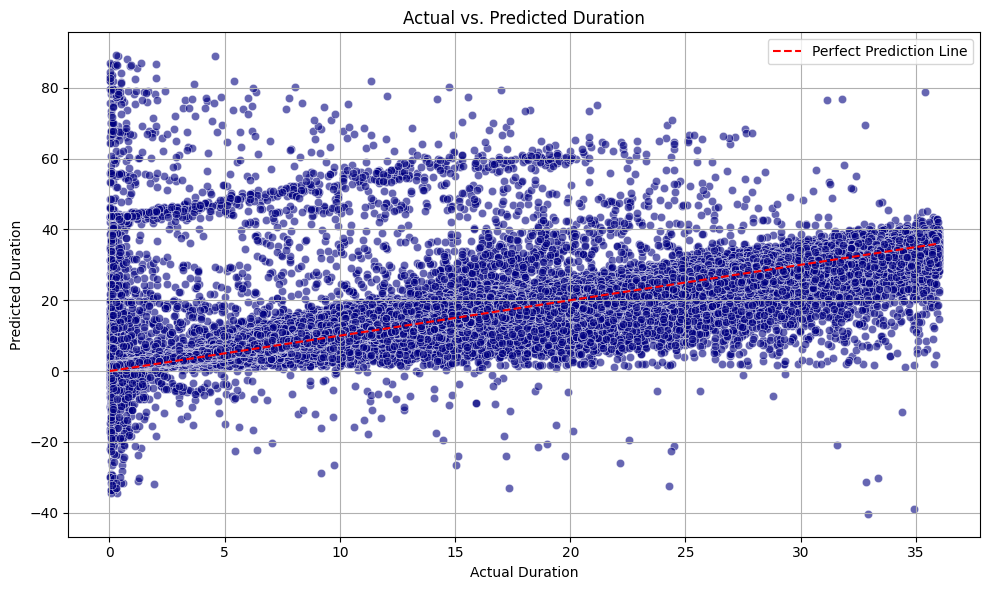

In [33]:
# Visualization: Actual vs. Predicted
plt.figure(figsize=(10, 6))
# seaborn scatterplot and their attributes
sns.scatterplot(x=dframe['duration'], y=dframe['predicted_duration'], alpha=0.6, color='navy')
plt.plot([dframe['duration'].min(), dframe['duration'].max()],
         [dframe['duration'].min(), dframe['duration'].max()],
         color='red', linestyle='--', label='Perfect Prediction Line')

# Show Title and xlabel, ylabel
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted Duration')
# Show the legends
plt.legend()
# Show the graph grids
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### Interpretation of Simple linear regression Analysis R_Square Value.